In [1]:
import sklearn 
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv("lab3.csv")
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


<AxesSubplot:xlabel='Category', ylabel='count'>

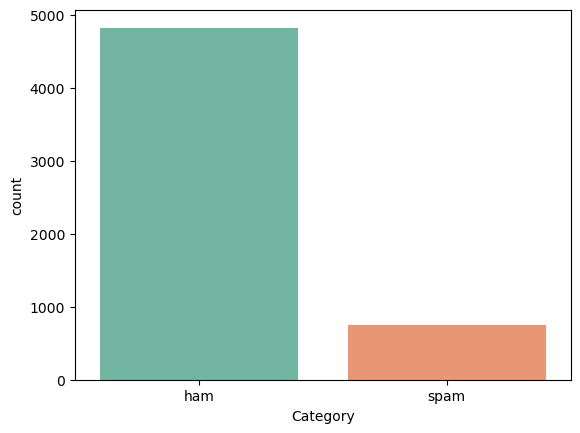

In [3]:
# A1 & A2
# Since our group is working on textual data, in keeping in line with 
# classification we have decided to perform text categorization.
# In this regard I picked some comments which are classified into spam 
# and ham. We used this dataset to work on our lab assignment this week.

import seaborn as sns

sns.countplot(x = "Category", data = df, palette = "Set2")

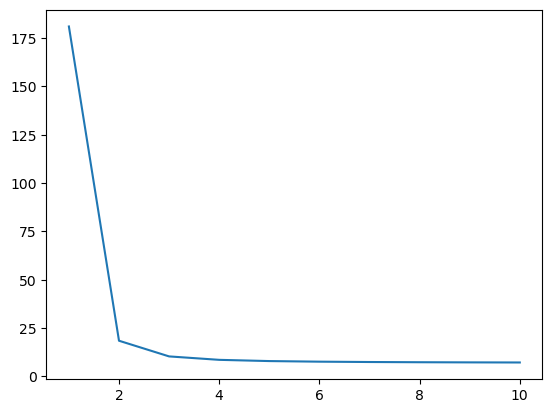

In [4]:
# A3
# To show an example of Minkowski Distance since we will work on some 
# text. By using countvectorizer we will prepare two vectors for which 
# we will find distance.

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import DistanceMetric
import matplotlib.pyplot as plt

text = [
    'As he crossed toward the pharmacy at the corner he involuntarily turned his head because of a burst of light that had ricocheted from his temple, and saw, with that quick smile with which we greet a rainbow or a rose, a blindingly white parallelogram of sky being unloaded from the van—a dresser with mirrors across which, as across a cinema screen, passed a flawlessly clear reflection of boughs sliding and swaying not arboreally, but with a human vacillation, produced by the nature of those who were carrying this sky, these boughs, this gliding façade.',
    'On offering to help the blind man, the man who then stole his car, had not, at that precise moment, had any evil intention, quite the contrary, what he did was nothing more than obey those feelings of generosity and altruism which, as everyone knows, are the two best traits of human nature and to be found in much more hardened criminals than this one, a simple car-thief without any hope of advancing in his profession, exploited by the real owners of this enterprise, for it is they who take advantage of the needs of the poor.'
]

cv = CountVectorizer()
vector_arr = cv.fit_transform(text)

dist_lst = {}

for i in range(1, 11):
    
    dist = DistanceMetric.get_metric('minkowski', p=i)
    dist_lst[i] = dist.pairwise(vector_arr)[0][1]

plt.plot(dist_lst.keys(), dist_lst.values())

In [5]:
# A4
# Before splitting the data, we have to make sure the sample size for 
# ham and spam are similar, otherwise the predictions could be dominated
# by the sample which is larger. So we balance our dataset.

# Split dataset into two sample sets: ham and spam.
ham = df[df['Category'] == 'ham']
spam = df[df['Category'] == 'spam']
print("Sizes before balancing: ", ham.shape, spam.shape)

Sizes before balancing:  (4825, 2) (747, 2)


In [6]:
ham = ham.sample(spam.shape[0])
print("Sizes after balancing: ", ham.shape, spam.shape)

# Now combine these to form a dataset.
dataset = pd.concat([ham, spam], ignore_index=True)

Sizes after balancing:  (747, 2) (747, 2)


In [7]:
# Now we can split this dataset, into test and train.
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(dataset['Message'], 
                                                    dataset['Category'],
                                                    test_size = 0.2, 
                                                    random_state = 101, 
                                                    shuffle = True)

In [8]:
# A5
# First we need to convert the text into numerical form so it can be 
# meaningful when used by the classifier. 

# Vectorization with TF-IDF (Term Frequency-Inverse Document Frequency) 
# is a method in NLP that converts text into numerical form and it tends
# to have a good performance in spam detection because it takes into
# account the importance of words based on their frequency in the
# document and their rarity across the entire corpus. This can help in
# distinguishing relevant words from common ones that might not
# contribute much to the task, potentially leading to better separation 
# between legitimate messages and spam.

from sklearn.feature_extraction.text import TfidfVectorizer

tfid = TfidfVectorizer()
x_train = tfid.fit_transform(x_train)
x_test = tfid.transform(x_test)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors = 3)
neigh.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [10]:
# A6 
# Finding the accuracy score.
neigh.score(x_test, y_test)

0.939799331103679

In [11]:
# A7
# Given a list 'corpus' of ten spam comments I found on the internet. I
# also added a sentence of my own to test it.
corpus = [    
    'The IRS is trying to reach you',
    'You have a refund',
    'You have a package delivery. Please verify',
    'You have a new billing statement',
    'Congratulations, You won!',
    'Verify your bank account details',
    'Verify your Apple iCloud ID',
    'A family member needs some help',
    'Reactivate your account',
    'Receive your Bitcoin Gift',
    'My name is Madhav Manoj.']

In [12]:
# Transform the corpus into numerical form using TfIdf vectorizer.
x_predict = tfid.transform(corpus)
predicted = neigh.predict(x_predict)

In [13]:
df_pred = pd.DataFrame(corpus, columns = ['Sample Text'])

true_values = ['spam']*10
true_values.append('ham')
df_pred['True Category'] = true_values
df_pred['Predicted Category(k=3)'] = predicted

In [14]:
df_pred

,Sample Text,True Category,Predicted Category(k=3)
0,The IRS is trying to reach you,spam,spam
1,You have a refund,spam,ham
2,You have a package delivery. Please verify,spam,spam
3,You have a new billing statement,spam,spam
4,"Congratulations, You won!",spam,spam
5,Verify your bank account details,spam,spam
6,Verify your Apple iCloud ID,spam,spam
7,A family member needs some help,spam,spam
8,Reactivate your account,spam,spam
9,Receive your Bitcoin Gift,spam,spam


In [15]:
# A8
# With k = 1

neigh_k1 = KNeighborsClassifier(n_neighbors = 1)
neigh_k1.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [16]:
# Accuracy score for classifier with k = 1
neigh_k1.score(x_test, y_test)

0.9163879598662207

In [17]:
predicted_k1 = neigh_k1.predict(x_predict)
df_pred['Predicted Category(k=1)'] = predicted_k1
df_pred

,Sample Text,True Category,Predicted Category(k=3),Predicted Category(k=1)
0,The IRS is trying to reach you,spam,spam,ham
1,You have a refund,spam,ham,ham
2,You have a package delivery. Please verify,spam,spam,spam
3,You have a new billing statement,spam,spam,spam
4,"Congratulations, You won!",spam,spam,spam
5,Verify your bank account details,spam,spam,spam
6,Verify your Apple iCloud ID,spam,spam,spam
7,A family member needs some help,spam,spam,spam
8,Reactivate your account,spam,spam,spam
9,Receive your Bitcoin Gift,spam,spam,spam


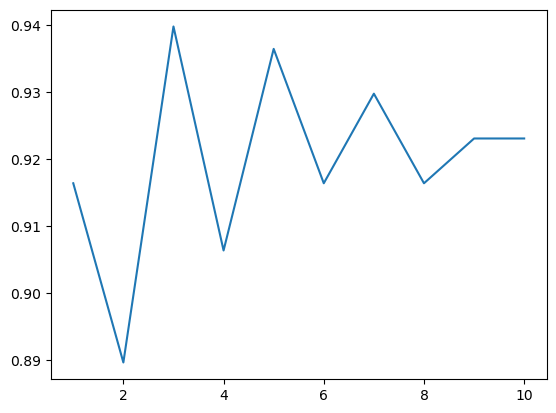

In [19]:
# Comparing for k = 1 to 11

acc_scr_lst = {}

for i in range(1, 11):
    temp = KNeighborsClassifier(n_neighbors = i)
    temp.fit(x_train, y_train)
    acc_scr_lst[i] = temp.score(x_test, y_test)

plt.plot(acc_scr_lst.keys(), acc_scr_lst.values())

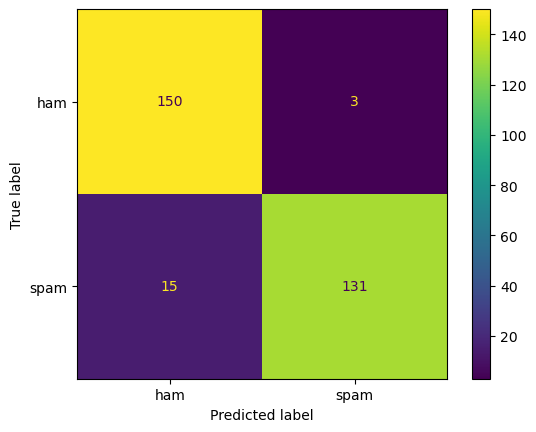

In [31]:
# A9
# Confusion matrix and related measures.

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = neigh.predict(x_test)
y_train_pred = neigh.predict(x_train)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [35]:
from sklearn.metrics import classification_report
import sklearn.metrics as sk

print("For test data:")
print("Precision Score: ", sk.precision_score(y_test, y_pred, pos_label = 'ham'))
print("Recall Score: ", sk.recall_score(y_test, y_pred, pos_label = 'ham'))
print("F1 Score: ", sk.f1_score(y_test, y_pred, pos_label = 'ham'))

For test data:
Precision Score:  0.9090909090909091
Recall Score:  0.9803921568627451
F1 Score:  0.9433962264150944


In [37]:
print("For training data:")
print("Precision Score: ", sk.precision_score(y_train, y_train_pred, pos_label = 'ham'))
print("Recall Score: ", sk.recall_score(y_train, y_train_pred, pos_label = 'ham'))
print("F1 Score: ", sk.f1_score(y_train, y_train_pred, pos_label = 'ham'))

For training data:
Precision Score:  0.9591503267973857
Recall Score:  0.9882154882154882
F1 Score:  0.9734660033167496


In [38]:
# We can see all scores are relatively high, however the training data 
# has not been overfitted according to the training data since none of 
# the scores are 100% for training data measures. So it is regularfit.